# Tesseract OCR

https://nanonets.com/blog/ocr-with-tesseract/

## ติดตั้ง tesseract สำหรับใช้งานในภาษา python

In [1]:
! pip install pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.0-py2.py3-none-any.whl size=20970 sha256=6755a105a8e7736bfd9b7737cc3a5ba4c9340015d502a6ca3e751360d54fd922
  Stored in directory: /root/.cache/pip/wheels/78/c9/ac/4cb76bd547f9970070522439e5203ba7926c5c5c4f131583ea
Successfully built pytesseract


## ติดตั้ง  tesseract สำหรับภาษาไทย

In [5]:
! apt-get install tesseract-ocr-tha

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd tesseract-ocr-tha
0 upgraded, 4 newly installed, 0 to remove and 7 not upgraded.
Need to get 5,693 kB of archives.
After this operation, 16.9 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Get:4 http://archive.ubuntu.com/ub

## ตรวจสอบภาษาที่สามารถใช้งานได้

In [6]:
! tesseract --list-langs

List of available languages (3):
tha
eng
osd


In [10]:
! tesseract --help

Usage:
  tesseract --help | --help-extra | --version
  tesseract --list-langs
  tesseract imagename outputbase [options...] [configfile...]

OCR options:
  -l LANG[+LANG]        Specify language(s) used for OCR.
NOTE: These options must occur before any configfile.

Single options:
  --help                Show this help message.
  --help-extra          Show extra help for advanced users.
  --version             Show version information.
  --list-langs          List available languages for tesseract engine.


## ค้นหาบริเวณตัวอักษร (character)

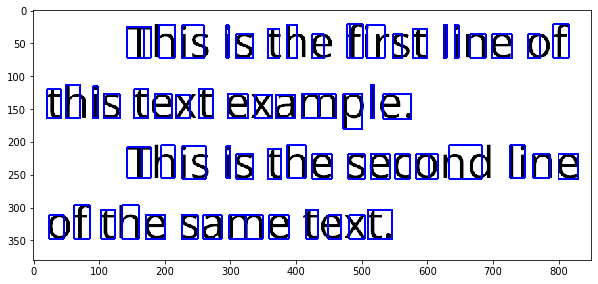

In [9]:
import matplotlib.pyplot as plt
import cv2
import pytesseract

img = cv2.imread('line-indent.png')

h, w, c = img.shape
boxes = pytesseract.image_to_boxes(img)
for b in boxes.splitlines():
  b = b.split(' ')
  img = cv2.rectangle(img, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 0, 255), 2)

plt.figure(figsize=(10,5))
plt.imshow(img)
plt.show()


## ค้นหาบริเวณของคำ (word)

In [12]:
import matplotlib.pyplot as plt
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('line-indent.png')

d = pytesseract.image_to_data(img, output_type=Output.DICT)
print(d.keys())


dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


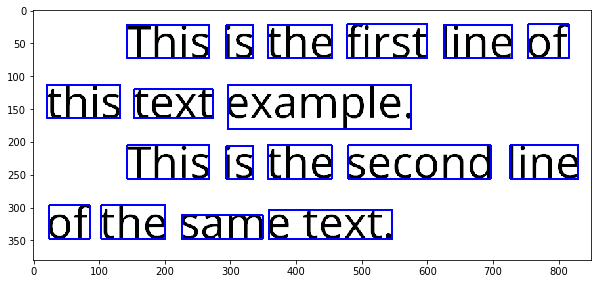

In [14]:
n_boxes = len(d['text'])
for i in range(n_boxes):
  if int(d['conf'][i]) > 60:
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
    img = cv2.rectangle(img, (x, y), (x + w, y + h), (0, 0, 255), 2)

plt.figure(figsize=(10,5))
plt.imshow(img)
plt.show()

## ค้นหาข้อความในรูปภาพ - Text search in image

### ตรวจสอบข้อมูลในตัวแปร List

In [86]:
d['text']

['',
 '',
 '',
 '',
 'This',
 'is',
 'the',
 'first',
 'line',
 'of',
 '',
 'this',
 'text',
 'example.',
 '',
 '',
 'This',
 'is',
 'the',
 'second',
 'line',
 '',
 'of',
 'the',
 'same',
 'text.']

### ค้นหาข้อมูลด้วย regular expression

In [84]:
import re

pattern = '[tT][he]'
for i in range(0, len(d['text'])):
  if(re.search(pattern, d['text'][i])):
    print('Match:', d['text'][i])
  else:
    print('No')

No
No
No
No
Match: This
No
Match: the
No
No
No
No
Match: this
Match: text
No
No
No
Match: This
No
Match: the
No
No
No
No
Match: the
No
Match: text.


## โปรแกรม Search text in image

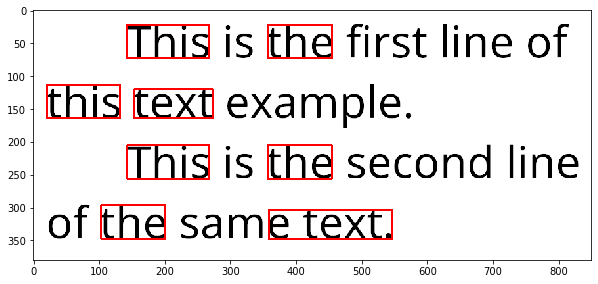

In [88]:
import re
import numpy as np
import cv2
import pytesseract
from pytesseract import Output

img = cv2.imread('line-indent.png')
search_img = np.array(img, copy=True)
d = pytesseract.image_to_data(img, output_type=Output.DICT)
keys = list(d.keys())

# รูปแบบของข้อความที่ต้องการค้นหา
#date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'
#pattern = '^[To]a*'
pattern = '[tT][he]'

n_boxes = len(d['text'])
for i in range(n_boxes):
  if int(d['conf'][i]) > 60:
    #if re.match(pattern, d['text'][i]):
    if re.search(pattern, d['text'][i]):
      (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
      cv2.rectangle(search_img, (x, y), (x + w, y + h), (255, 0, 0), 2)

plt.figure(figsize=(10,5))
plt.imshow(search_img)
plt.show()